<a href="https://colab.research.google.com/github/DaviFerreira0106/notebooks-inteligenciaArtificial/blob/main/Atividade_kmeans_randomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criação do DataSet

In [36]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np

# Definindo o número de alunos
n_students = 2000

# Criação das variáveis com distribuição aleatória
data = {
    "Student_ID": range(1, n_students + 1),
    "Attendance": np.random.normal(80, 10, n_students),  # Presença média em percentual
    "Assignments_Completed": np.random.randint(0, 20, n_students),  # Tarefas entregues
    "Study_Hours_Per_Week": np.random.normal(15, 5, n_students),  # Horas de estudo semanais
    "Previous_Test_Score": np.random.normal(70, 15, n_students),  # Nota de prova anterior em percentual
    "Forum_Participation": np.random.normal(30, 10, n_students),  # Participação em fóruns
    "Age": np.random.randint(18, 35, n_students),  # Idade dos alunos
    "Socioeconomic_Status": np.random.choice(["Low", "Medium", "High"], n_students),  # Status socioeconômico
}

# Conversão para DataFrame
df = pd.DataFrame(data)

# Lógica para atribuir o nível de risco de desempenho
conditions = [
    (df["Attendance"] < 70) & (df["Study_Hours_Per_Week"] < 10) & (df["Previous_Test_Score"] < 50),
    (df["Attendance"] >= 70) & (df["Attendance"] < 85) & (df["Study_Hours_Per_Week"] >= 10) & (df["Previous_Test_Score"] >= 50),
    (df["Attendance"] >= 85) & (df["Study_Hours_Per_Week"] >= 15) & (df["Previous_Test_Score"] >= 60)
]

# Níveis de risco baseados nas condições definidas
risk_levels = ["Alto Risco", "Médio Risco", "Baixo Risco"]
df["Risk_Level"] = np.select(conditions, risk_levels, default="Médio Risco")

# Visualização dos primeiros registros
df.head()

,Student_ID,Attendance,Assignments_Completed,Study_Hours_Per_Week,Previous_Test_Score,Forum_Participation,Age,Socioeconomic_Status,Risk_Level
0,1,74.421736,5,19.146424,59.770163,14.880035,18,Low,Médio Risco
1,2,78.634365,19,21.049483,60.618451,37.222426,27,Low,Médio Risco
2,3,76.872297,13,10.172598,56.804417,26.715409,23,High,Médio Risco
3,4,91.276524,5,18.337243,77.080471,46.140972,21,Low,Baixo Risco
4,5,79.395218,19,14.446637,88.479090,36.085989,30,Low,Médio Risco


# 1. Compreenda os Dados

Antes de começar a usar os algoritmos, é essencial entender o que cada coluna do conjunto de dados representa. Isso ajuda a saber quais variáveis podem ser úteis para identificar o risco de desempenho.

O que fazer:

Leia as colunas do dataset. Observe variáveis como:
Attendance (Presença): Percentual de frequência nas aulas.
Study_Hours_Per_Week (Horas de Estudo por Semana): Quantidade média de horas dedicadas ao estudo semanalmente.
Previous_Test_Score (Nota em Testes Anteriores): Desempenho em avaliações anteriores.
Observe as variáveis com números (presença, horas de estudo, etc.), pois são elas que vamos usar no K-means.
Dica: Fazer uma análise básica (como média e desvio padrão) dessas variáveis ajuda a ver como os dados estão distribuídos. Isso será útil para entender melhor os grupos que vamos criar.

In [37]:
df.head()

,Student_ID,Attendance,Assignments_Completed,Study_Hours_Per_Week,Previous_Test_Score,Forum_Participation,Age,Socioeconomic_Status,Risk_Level
0,1,74.421736,5,19.146424,59.770163,14.880035,18,Low,Médio Risco
1,2,78.634365,19,21.049483,60.618451,37.222426,27,Low,Médio Risco
2,3,76.872297,13,10.172598,56.804417,26.715409,23,High,Médio Risco
3,4,91.276524,5,18.337243,77.080471,46.140972,21,Low,Baixo Risco
4,5,79.395218,19,14.446637,88.479090,36.085989,30,Low,Médio Risco


# 2. Agrupe os Alunos com K-means

O K-means cria grupos de dados que possuem características semelhantes. Aqui, vamos usá-lo para identificar diferentes perfis de alunos, como aqueles que participam mais ou menos das atividades.

O que fazer:

* Escolha quantos grupos (clusters) deseja formar. Um bom começo é tentar entre 3 e 5 grupos. O ideal é testar diferentes quantidades e observar o comportamento dos grupos formados.
*   Utilize variáveis como Attendance, Study_Hours_Per_Week, Assignments_Completed (tarefas concluídas) e Previous_Test_Score para formar os grupos.

Dica: A escolha do número de grupos pode ser feita pelo método do cotovelo (Elbow Method), que mostra graficamente o ponto onde os grupos começam a perder a qualidade. Peça ajuda ao instrutor ou consulte um tutorial para entender como o método do cotovelo funciona.

Resultado Esperado: Depois de aplicar o K-means, você verá grupos de alunos com características semelhantes. Interprete os grupos e pense no que os diferencia (por exemplo, um grupo com alta presença e boas notas pode indicar alunos dedicados).

## Importação das bibliotecas necessárias

In [38]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Pré-processamento dos dados

In [39]:
# inicializando o normalizados
scaler = StandardScaler()

# aplicando a normalização aos dados
data_scaled = scaler.fit_transform(df[['Attendance', 'Study_Hours_Per_Week', 'Assignments_Completed', 'Previous_Test_Score']])

print(data_scaled)

[[-0.61081446  0.82770612 -0.76298634 -0.69428629]
 [-0.18553687  1.21731567  1.65562767 -0.63736291]
 [-0.36342289 -1.00948795  0.61907881 -0.89329913]
 ...
 [ 2.06899879  2.98153302 -1.28126077  0.66272185]
 [ 0.12825177  0.34741091 -0.41747005 -0.21374136]
 [ 1.09524316  1.31616017  1.31011138  0.38228222]]


## Determinando um número ideal de clusters

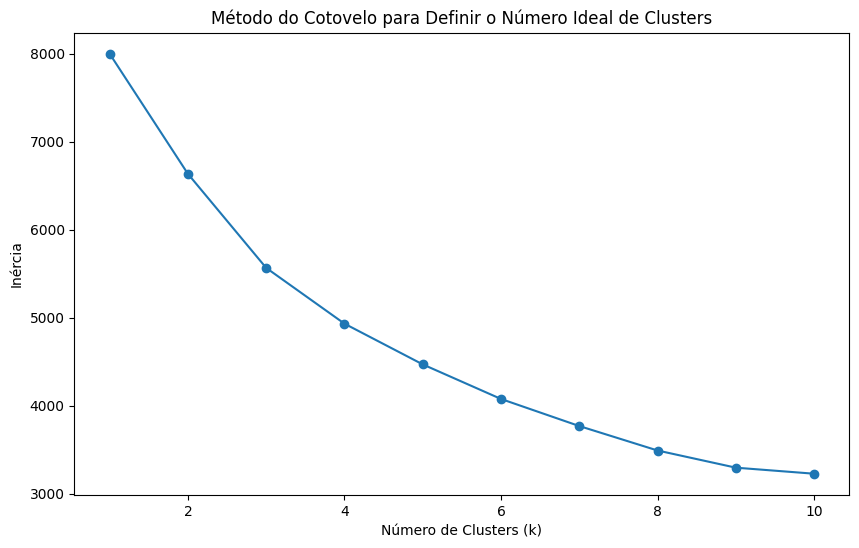

In [40]:
# Calculando método do cotovelo
inercia = []
k_values = range(1, 11)

for k in k_values:
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(data_scaled)
  inercia.append(kmeans.inertia_)

# visualizando o método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_values, inercia, marker= 'o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Definir o Número Ideal de Clusters')
plt.show()

## Treinando o Modelo K-Means

In [41]:
# inicializando o K-Means com k=4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

# ajustando o modelo e criando a coluna 'Cluster'
df['Cluster'] = kmeans.fit_predict(data_scaled)
df.head()

,Student_ID,Attendance,Assignments_Completed,Study_Hours_Per_Week,Previous_Test_Score,Forum_Participation,Age,Socioeconomic_Status,Risk_Level,Cluster
0,1,74.421736,5,19.146424,59.770163,14.880035,18,Low,Médio Risco,1
1,2,78.634365,19,21.049483,60.618451,37.222426,27,Low,Médio Risco,3
2,3,76.872297,13,10.172598,56.804417,26.715409,23,High,Médio Risco,3
3,4,91.276524,5,18.337243,77.080471,46.140972,21,Low,Baixo Risco,0
4,5,79.395218,19,14.446637,88.479090,36.085989,30,Low,Médio Risco,2


## Visualizando os Clusters com Centróides

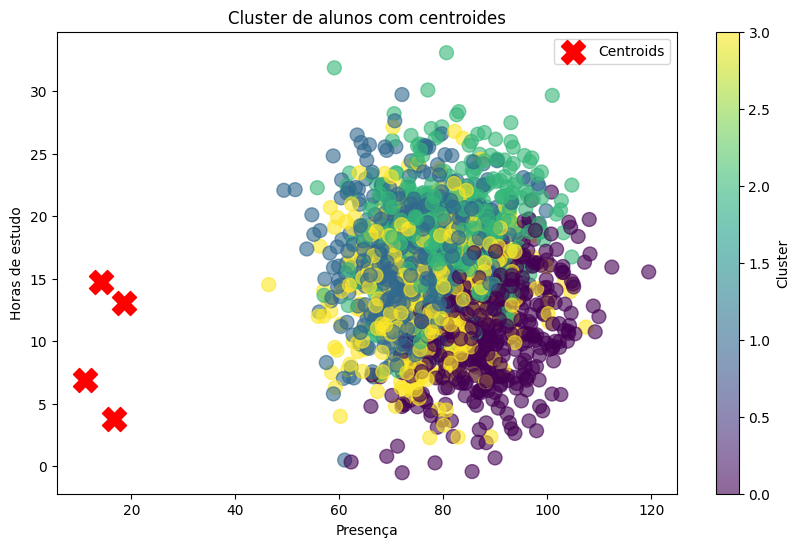

In [42]:
# plotando os clusters com os centróides
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Attendance'], df['Study_Hours_Per_Week'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.6)

# obtendo os centroides e invertendo a normalização
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 1], centroids[:, 2], s=300, c='red', marker='X', label='Centroids')
plt.title('Cluster de alunos com centroides')
plt.xlabel('Presença')
plt.ylabel('Horas de estudo')
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.show()

# 3. Atribua um Nível de Risco a Cada Aluno

Depois de formar os grupos, o próximo passo é criar rótulos para classificar o risco de desempenho dos alunos. Baseado nas características dos grupos, você pode atribuir rótulos de alto risco, médio risco ou baixo risco de desempenho.

O que fazer:

*   Analise os clusters criados no passo anterior. Por exemplo:
  *  Alunos com baixa presença e poucas horas de estudo podem ser classificados como alto risco.
  *   Alunos com frequência e estudo intermediários podem ser médio risco.
  *   Alunos com alta presença e bom desempenho podem ser baixo risco.


*   Adicione esses rótulos ao dataset, criando uma coluna para o nível de risco.

Dica: Converse com o grupo sobre os critérios de cada nível de risco. Isso ajudará a definir um padrão lógico e consistente para todos os alunos.

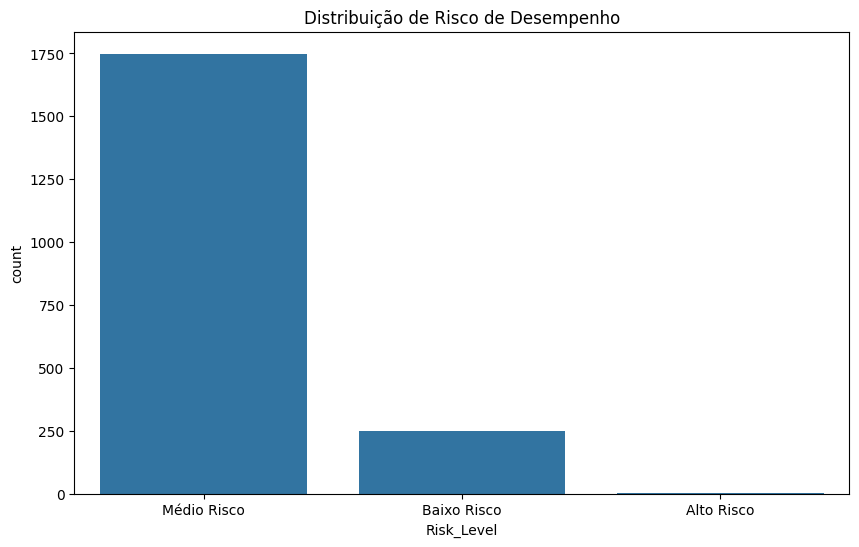

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Risk_Level', data=df)
plt.title('Distribuição de Risco de Desempenho')
plt.show()

# 4. Treine o Random Forest para Classificar o Risco

Agora, vamos usar o Random Forest, um algoritmo de classificação, para identificar automaticamente o nível de risco dos alunos. A ideia é treinar o modelo com os dados rotulados (etiquetados) para que ele consiga classificar novos alunos futuramente.

O que fazer:

*   Divida o dataset em duas partes: uma para treinar o modelo e outra para testá-lo.
*   Use as colunas Attendance, Study_Hours_Per_Week, Assignments_Completed, Forum_Participation, entre outras, como variáveis de entrada. A coluna Risk_Level será a variável alvo (a que o modelo tentará prever).
* Treine o modelo com o Random Forest para que ele consiga classificar o nível de risco dos alunos com base nas variáveis comportamentais e demográficas.

Dica: O Random Forest permite ver quais variáveis têm maior importância na classificação. Isso significa que você poderá saber quais fatores (como presença ou horas de estudo) são mais relevantes para definir o risco.

## Importação das bibliotecas necessárias

In [44]:
# Importando bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder

## Dividindo o DataSet em Treino e Teste

In [45]:
X = df[['Attendance', 'Study_Hours_Per_Week', 'Assignments_Completed', 'Forum_Participation']]
y = df['Risk_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Criação do Modelo de Floresta Aleatória

In [48]:
# Modelo de Floresta Aleatória
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Fazer previsões
y_pred = rf.predict(X_test)

# Avaliar o modelo
rf_accuracy = accuracy_score(y_test, y_pred)
rf_report = classification_report(y_test, y_pred)

print("Acurácia do Modelo de Floresta Aleatória:", rf_accuracy)
print("Relatório de Classificação do Modelo de Floresta Aleatória:\n", rf_report)


Acurácia do Modelo de Floresta Aleatória: 0.9525
Relatório de Classificação do Modelo de Floresta Aleatória:
               precision    recall  f1-score   support

 Baixo Risco       0.72      0.98      0.83        47
 Médio Risco       1.00      0.95      0.97       353

    accuracy                           0.95       400
   macro avg       0.86      0.96      0.90       400
weighted avg       0.96      0.95      0.96       400



## Adição de validação cruzada e Otimização com GridSerach

In [50]:
# GridSearchCV na Floresta Aleatória
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

best_rf_params = grid_rf.best_params_
best_rf_score = grid_rf.best_score_

best_rf_params, best_rf_score

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


({'max_depth': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 50},
 0.9674999999999999)

## Importancia das Features no Melhor Modelo de Floresta Aleatória

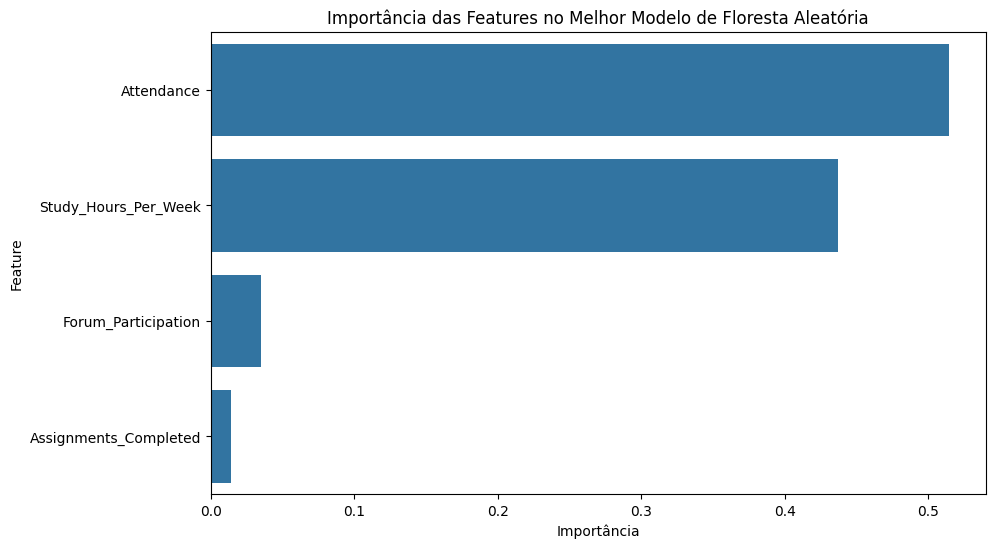

In [51]:
# Importância das features no melhor modelo de Floresta Aleatória
best_rf = grid_rf.best_estimator_
feature_importances = pd.DataFrame(best_rf.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

# Visualizando a importância das features
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.Importance, y=feature_importances.index)
plt.title('Importância das Features no Melhor Modelo de Floresta Aleatória')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

## Visualização de uma Arvore da Floresta Aleatória

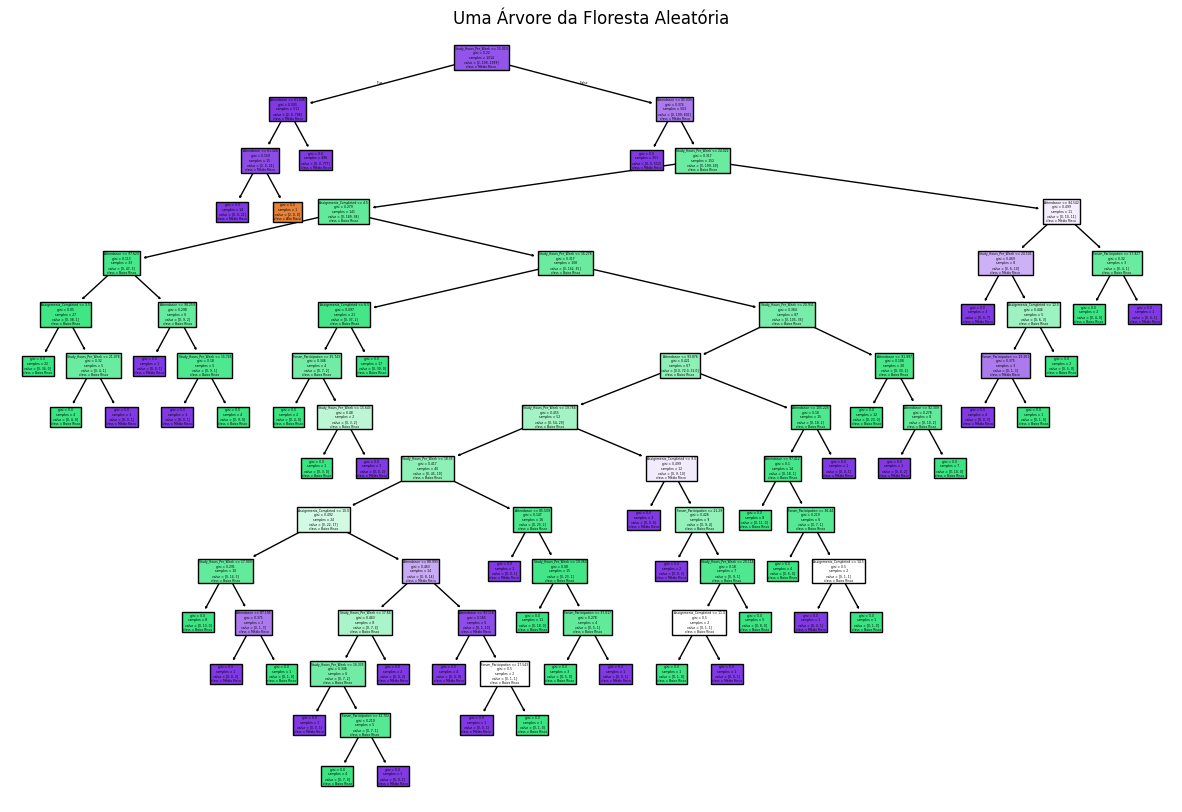

In [53]:
# Visualização de uma das arvores de floresta aleatoria
plt.figure(figsize=(15, 10))
estimator = rf.estimators_[0]  # Obtém a primeira árvore da floresta
plot_tree(estimator, filled=True, feature_names=X.columns, class_names=rf.classes_)
plt.title("Uma Árvore da Floresta Aleatória")
plt.show()
